# Random Forest


<img src="./images/forest.jpg" style="width:100%"/>

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. 

One of the most important features of the Random Forest Algorithm is that it can handle data sets containing continuous and categorical variables for both regression and classification problems.

### What is a Decision Tree? 

From a high level we can define Decision Trees as algorithms that can be used both classification and regression tasks providing a model to make predictions based on a universe of labeled training data.

A decision tree consists of several layers of IF-THEN-ELSE "forks" that are generated automatically during the training phase to fit the provided data.

#### An example of a decision tree

This decision tree classifies a numeric value as a probability, a percentage or invalid.

<img src="./images/decision-tree-example.png" style="width:500px"/>


## RandomForest

Since the decision tree can become very sensible to bad or inconsistent data and 
outliers the random forest algorithm creates and trains multiple decision trees 
which are combined to a single response taking their winner vote for classification or the average value  for regression problems.

<img src="./images/random-forest-example.png" style="width:600px"/>


#### Used only for tabular data

Random forests can only work with structured (tabular) data, meaning data that can be represented
as csv or any other similar technique. Unstructured data like images, speech or text cannot be
processed from random forest and most likely they will require some form of a Neural Network like CNN
or RNN for example.

#### Data requirements

Although "by book" Random Forests should be able to handle both missing and nominal
data the library that is widely used in the python world (SkLearn) does not comply
with it and in order to use it we will need to:

- Clean missing values (either removing them or adjusting them)
- Convert nominal data to categorical
- Unlike to NN in random forests there in no need to normalize or scale the data

#### Optimizing Scikit Random Forest Models

While the internal model parameters are learned during the 
training phase the hyperparameters must be specified in advance
(and this is why fine tuning a model is not exact science but it
involves a great deal of trial and error attempts).

Specifically for Random Forests two of the most important
hyperparameters to use are the following:

- The max number of decirsion trees in the forest
- The max number of features to use in an IF-THEN-ELSE case

The full description of what can be parameterized using
the Scikit implemenation see the
[officical documenenation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


**Easy to understand and interpret**

In contrary to NN or most of the other ML algorithms the random forest 
results to an easier to visualize model.  Of course in real world problems
even random forests might become hairy and difficult to follow but it in 
simpler problems they can be viewed in a intuitive friendly way.

**Inference friendly**

Based on it architecture having a trained decision tree model makes it very
easy to measure the significance of each feature.

**Not very sensitive to outliers**

Unlike decision trees the random forests are relatively stable in turns of outliers
since they consist of a large number of trees that tend to mitigate their impact.


**Memory intensive**

During the training phase it is possible for large amounts of memory to be 
required especially as the number of features grows.

**Training can become slow**

As the sample population grows both in terms of rows and features the algorithm
can become slow since it needs to process a large number of underlined trees.

**Biased Feature Importances**

Although we can easily see the importance of each feature it is also possible 
to reach a biased conclusion in the case that we have very few distinct and
correlated values.


### Example

The iris data set that we have already solve using a neural network is ideal
for a simple example of random forest as well. The main reason for this is that
all the features are numeric and the output consists of class (in other words
it is a classifier) so we can just use the dataset as is without the need to
preprosessing it.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data and randomize them.
df = pd.read_csv("./data/iris-dataset.csv")
df = df.sample(frac=1)
display(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.1,1.9,virginica
56,57,6.3,3.3,4.7,1.6,versicolor
113,114,5.7,2.5,5.0,2.0,virginica
85,86,6.0,3.4,4.5,1.6,versicolor
75,76,6.6,3.0,4.4,1.4,versicolor
...,...,...,...,...,...,...
123,124,6.3,2.7,4.9,1.8,virginica
72,73,6.3,2.5,4.9,1.5,versicolor
143,144,6.8,3.2,5.9,2.3,virginica
97,98,6.2,2.9,4.3,1.3,versicolor


## Convert targets to categorical

Since the target is a nominal value we need to convert it to categorical 
to make it compatible with the Sklearn implementation of Random Forest 
that we will use.

In [3]:
column_name = "Species"
temp = df.copy()
dummies = pd.get_dummies(temp[column_name], prefix=column_name)
new_frame = pd.concat( [temp, dummies], axis=1, join="inner")
df = new_frame.drop(columns=[column_name, "Id"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
142,5.8,2.7,5.1,1.9,0,0,1
56,6.3,3.3,4.7,1.6,0,1,0
113,5.7,2.5,5.0,2.0,0,0,1
85,6.0,3.4,4.5,1.6,0,1,0
75,6.6,3.0,4.4,1.4,0,1,0
...,...,...,...,...,...,...,...
123,6.3,2.7,4.9,1.8,0,0,1
72,6.3,2.5,4.9,1.5,0,1,0
143,6.8,3.2,5.9,2.3,0,0,1
97,6.2,2.9,4.3,1.3,0,1,0


The following picture can help us understand the objective of our model now that we have expanded the nominal targets to numberics:

<img src="./images/iris-input-output.png" style="width:60%"/>


## Separate the inputs and the outputs

The inputs (also known as features) must be contained in their own
data frame and the same applies to the outputs (labels) as well.

In [4]:
output_cols = ["Species_setosa", "Species_versicolor", "Species_virginica"]
X = df.copy()
Y = X[output_cols].copy()
X = X.drop(output_cols, axis=1)

display(X)
display(Y)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
142,5.8,2.7,5.1,1.9
56,6.3,3.3,4.7,1.6
113,5.7,2.5,5.0,2.0
85,6.0,3.4,4.5,1.6
75,6.6,3.0,4.4,1.4
...,...,...,...,...
123,6.3,2.7,4.9,1.8
72,6.3,2.5,4.9,1.5
143,6.8,3.2,5.9,2.3
97,6.2,2.9,4.3,1.3


,Species_setosa,Species_versicolor,Species_virginica
142,0,0,1
56,0,1,0
113,0,0,1
85,0,1,0
75,0,1,0
...,...,...,...
123,0,0,1
72,0,1,0
143,0,0,1
97,0,1,0


## Split the data to two train and test

The training data (consisting both of X and Y values) are used to train the algoritm 
while the testing data are neven seen from the training algorithm and we use them
to see how well our model performs.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Number of rows")
print("Train", X_train.shape[0])
print("Test", X_test.shape[0])

Number of rows
Train 120
Test 30


## Create and train the model

In [6]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf.fit(X_train, y_train.values)

RandomForestClassifier(max_features='sqrt')

## Find the accuracy of the model

In [7]:
accuracy_rf = clf.score(X_test, y_test)
print(f'accuracy: {accuracy_rf}')

accuracy: 0.9666666666666667


## Define the function to export random forest to image

In [10]:
def random_forest_to_image(model, file_name, features=None, classes=None):
    """Exports the passed in Random Forest to an image.

    Used the graphviz utility which has to be installed in the
    host machine. To install it under Ubuntu you can use the
    following ( not sure how to install it in Mac or any other OS):

    sudo apt install graphviz

    :param model : The Sklearn RandomForest model to export.
    :param str file_name: The file name (without an extension) to export to.
    """
    from sklearn.tree import export_graphviz
    from subprocess import call

    assert '.' not in file_name
    estimator = model.estimators_[5]
    export_graphviz(estimator, out_file=f'{file_name}.dot',
                    feature_names=features,
                    class_names=classes,
                    rounded=True, proportion=False,
                    precision=2, filled=True)
    img_filename = f'{file_name}.png'
    # Requires Graphviz: sudo apt install graphviz
    call(
        [
            'dot', '-Tpng',
            f'{file_name}.dot',
            '-o',
            img_filename,
            '-Gdpi=600'
        ]
    )

    return img_filename


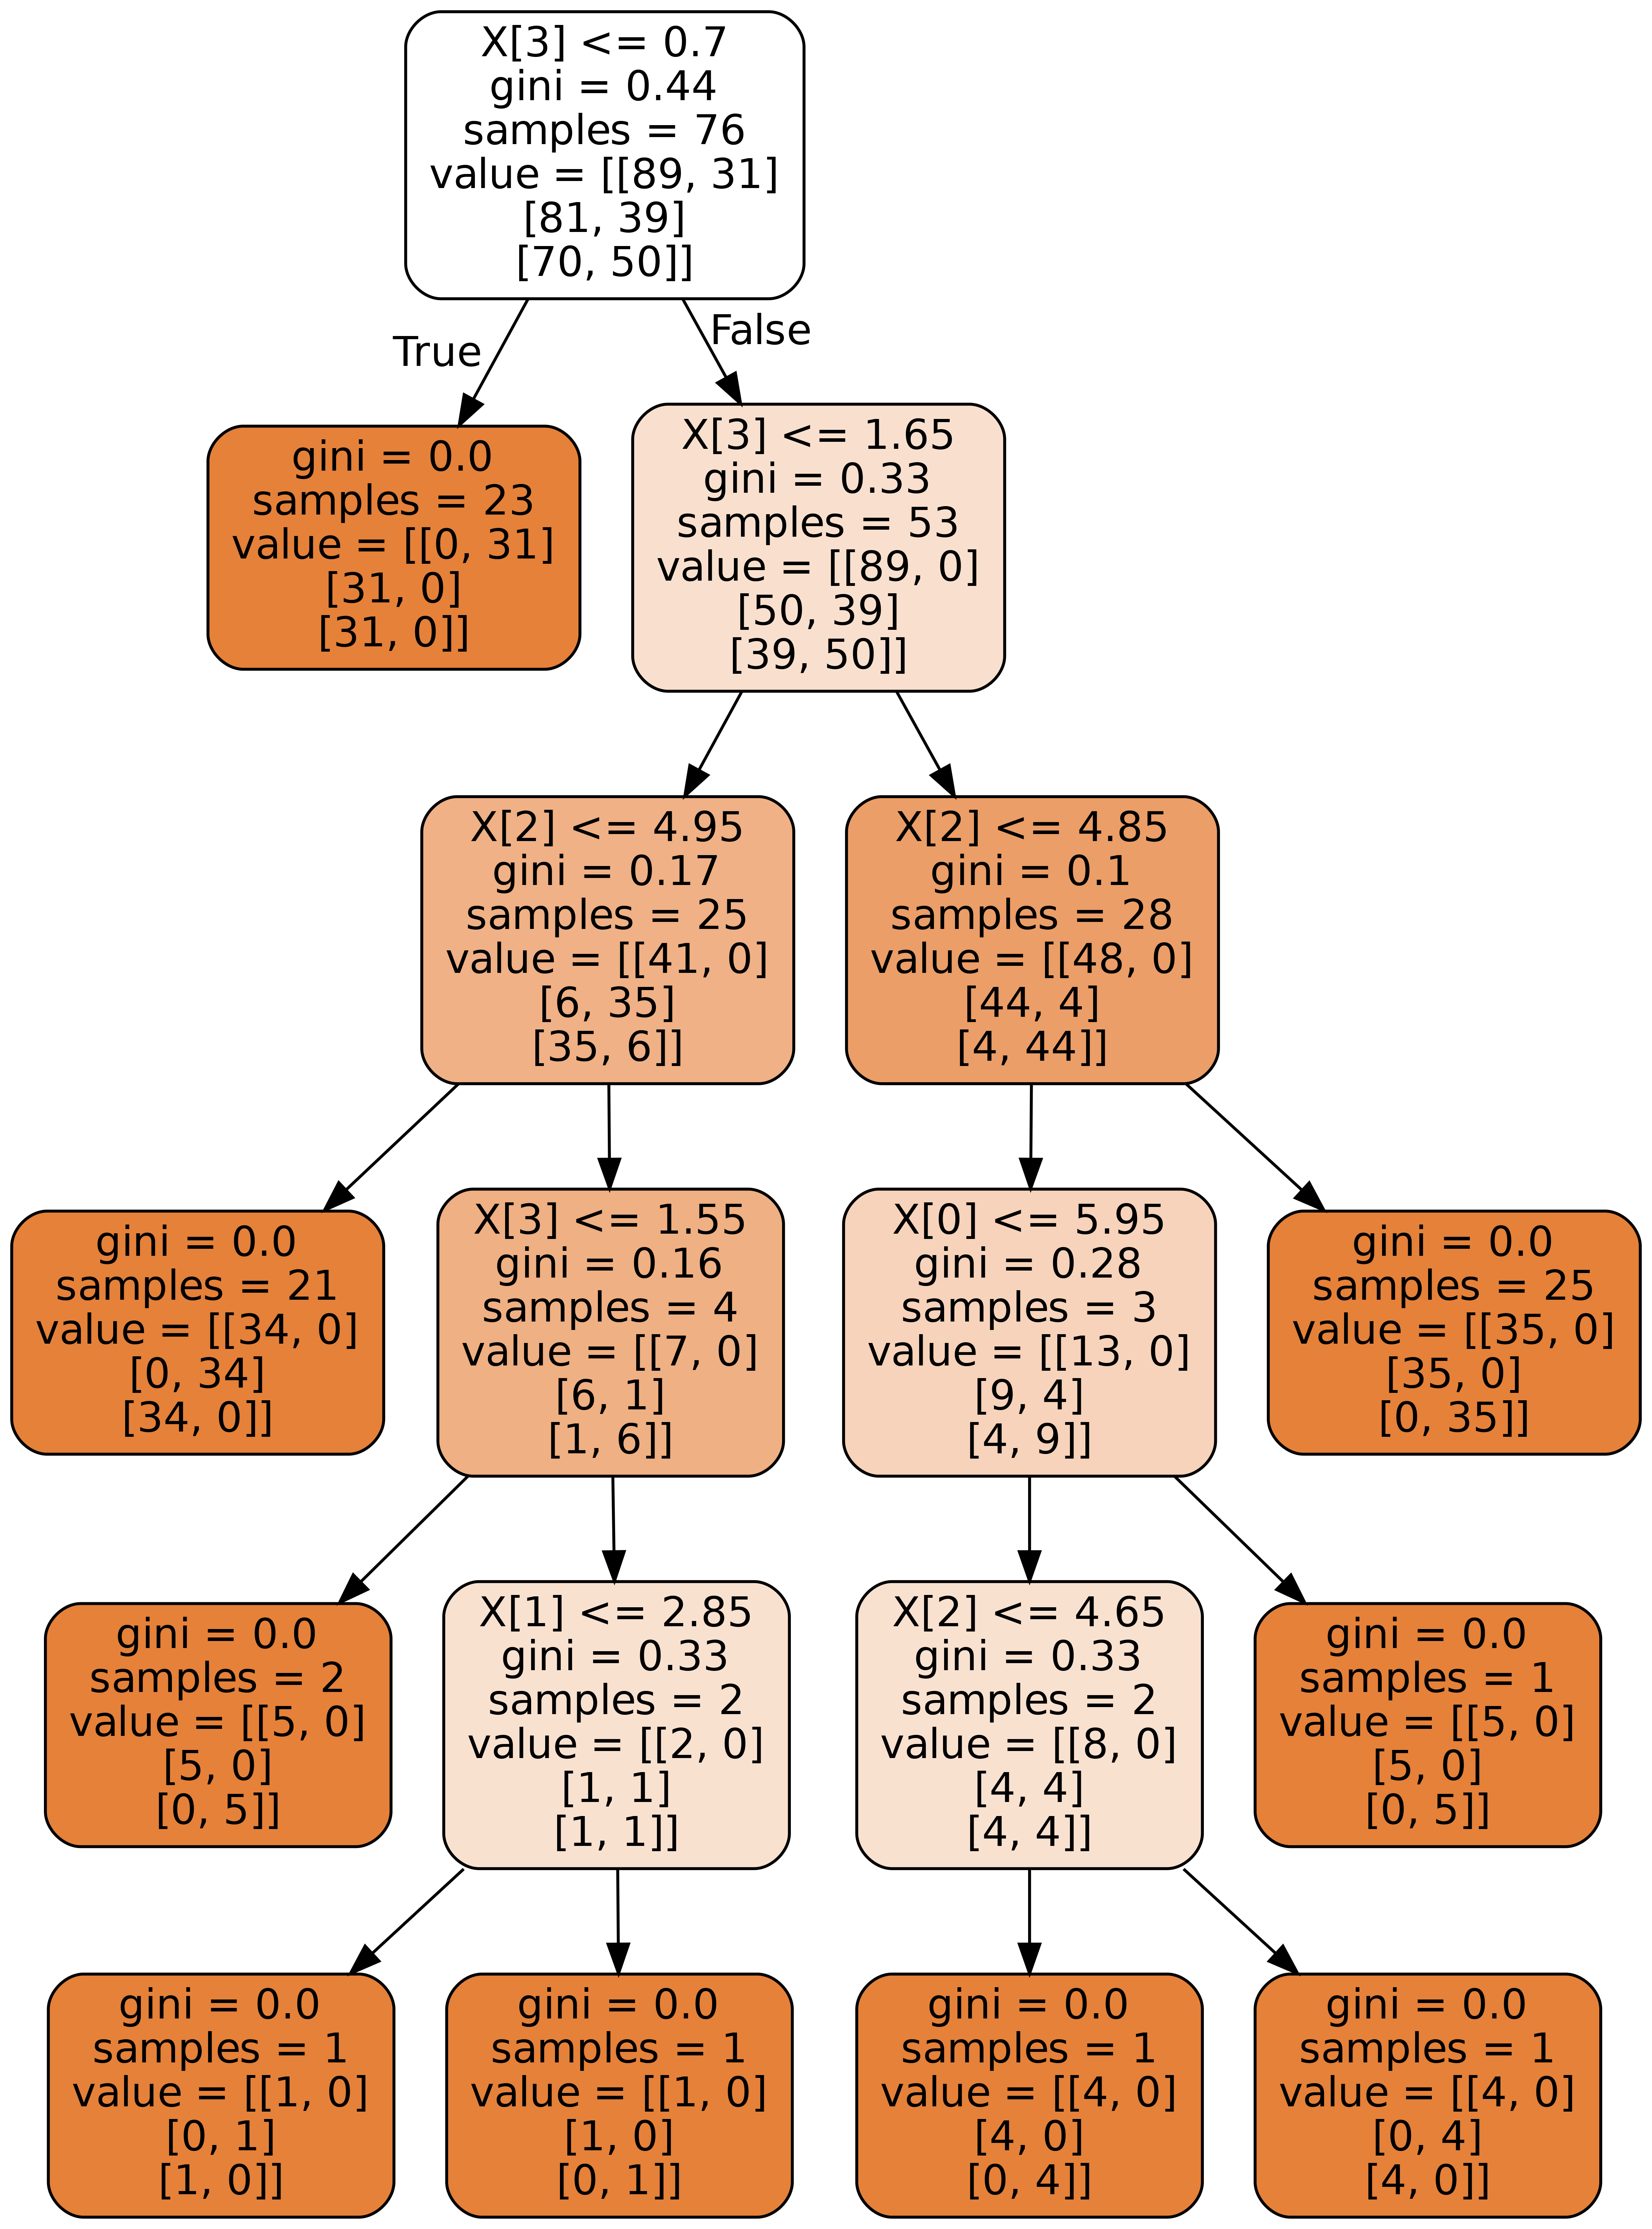

In [15]:
filename = random_forest_to_image(clf, "/tmp/sample-random-forest2")
from IPython.display import Image
Image(filename=filename) 